In [148]:
!pip install scikit-learn


In [140]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier,plot_tree



In [82]:
df=pd.read_excel("C:\\Users\\Vinoth Kumar\\Desktop\\bank.xlsx")
df



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [83]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [84]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

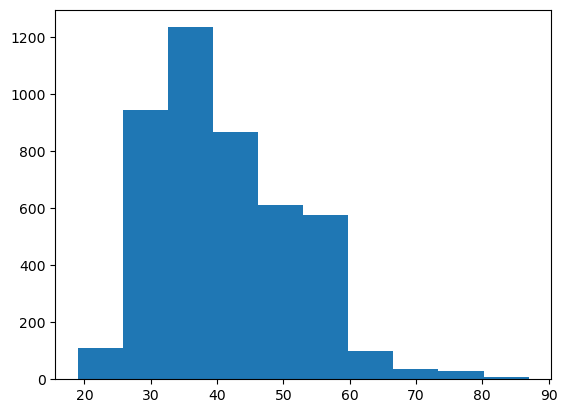

In [85]:
g=plt.hist(df['age'])

<Axes: xlabel='marital', ylabel='count'>

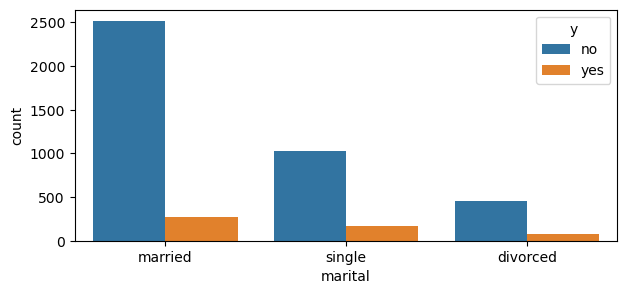

In [64]:
plt.figure(figsize=(7,3))
sns.countplot(x='marital',data=df,hue='y')

In [86]:

x=df['y']
x

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [92]:
df['y']=df['y'].replace({'no':0,'yes':1})
df['y']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [104]:
x=df.drop('y',axis=1)
y=df.y


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


In [110]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [122]:
m=df.select_dtypes(include='object').columns
m

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [123]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in m: 
    df[i]=le.fit_transform(df[i])

In [125]:
x=df.drop('y',axis=1)
y=df.y

In [126]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_data=scaler.fit_transform(x)

In [130]:
train_x,test_x,train_y,test_y=train_test_split(x_data,y,test_size=0.2)
decision_tree=DecisionTreeClassifier()
decision_tree.fit(train_x,train_y)

DecisionTreeClassifier()

In [131]:
decision_tree.score(train_x,train_y)

1.0

In [132]:
decision_tree.score(test_x,test_y)

0.850828729281768

In [138]:
ypred=decision_tree.predict(test_x)
cm=confusion_matrix(ypred,test_y)
cm

array([[728,  63],
       [ 72,  42]], dtype=int64)

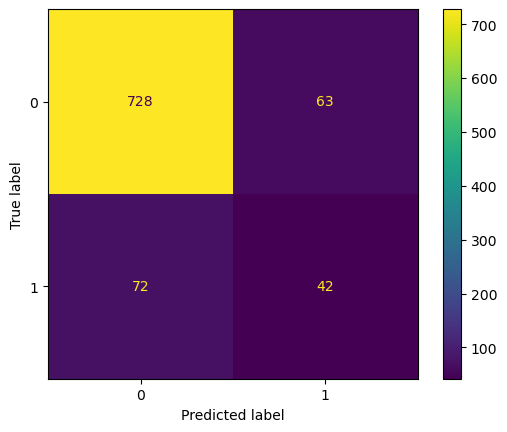

In [141]:
ConfusionMatrixDisplay(cm).plot()

In [143]:
acc=accuracy_score(test_y,ypred)
acc

0.850828729281768

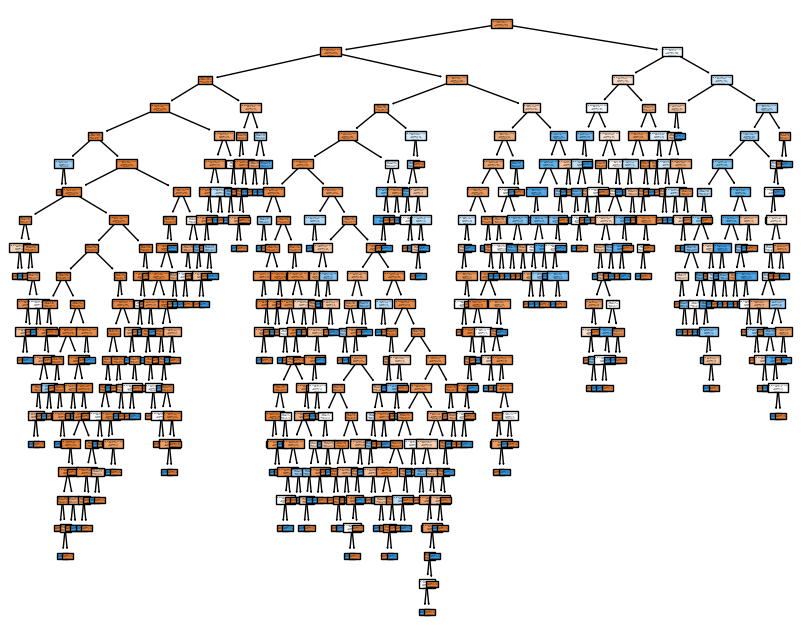

In [144]:
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()